# CS 5316 - Assignment # 3
#### The purpose of this assigment is to introduce nltk and keras. Please visit the below link for a quick introduction and installation.
#### __[nltk.org](http://www.nltk.org/)__

-  Please rename the file to nlp_assignment3_yourRollNo.<br>
-  Do not copy code from anywhere.<br>
-  Write clear and well commented code<br>
-  A viva may also be conducted.<br>
-  Solution must be written in this notebook (you do not need to submit any other files).
-  The output of all cells must be present in the version of the notebook you submit.
-  You can insert as many cells as you want for Sentiment analysis, POS tagging and NER tasks.

## Some basic tasks with nltk


In [2]:
import nltk

In [3]:
import itertools
import re
from nltk.stem import WordNetLemmatizer
from nltk.metrics.scores import (precision, recall, f_measure)

In [4]:
import numpy as np
from sklearn import metrics


In [5]:
text = ["Here are few sentences to tokenize.","Let's start with this one.", "How about one more?","hmmm that's sounds interesting!"]

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

### tokenize above text into bag of words using nltk<br>
#### This function should return a list

In [7]:
def question_one():  
    return list(itertools.chain.from_iterable([word_tokenize(line) for line in text]))
question_one()

['Here',
 'are',
 'few',
 'sentences',
 'to',
 'tokenize',
 '.',
 'Let',
 "'s",
 'start',
 'with',
 'this',
 'one',
 '.',
 'How',
 'about',
 'one',
 'more',
 '?',
 'hmmm',
 'that',
 "'s",
 'sounds',
 'interesting',
 '!']

### Remove punctuations from tokenized sentences using regex<br>
#### This function should return a list of words after punctuations are removed


In [8]:
def question_two(tokens=question_one()):
    punc_dectected = re.compile(r'\W')
    return [token for token in tokens if not punc_dectected.match(token)]
 
tokenized_text_no_punctuations = question_two()
tokenized_text_no_punctuations

['Here',
 'are',
 'few',
 'sentences',
 'to',
 'tokenize',
 'Let',
 'start',
 'with',
 'this',
 'one',
 'How',
 'about',
 'one',
 'more',
 'hmmm',
 'that',
 'sounds',
 'interesting']

### remove stop words
#### This function should also return a list of words without any punctuations and stop words

In [9]:
from nltk.corpus import stopwords

def question_three(words=question_two()):
    _stopwords = (stopwords.words('english'))
    return [token for token in words if token not in _stopwords]

question_three()

['Here',
 'sentences',
 'tokenize',
 'Let',
 'start',
 'one',
 'How',
 'one',
 'hmmm',
 'sounds',
 'interesting']

## In this part of the assigment you will be exploring a novel Sense and Sensibility by Jane Austen 1811

#### Run below code if you have already downloaded books from nltk. If you haven't then uncomment the line and run it. You can then download books using downloader.

In [11]:
# nltk.download()
from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

### total count of tokens
#### This function should return an integer

In [13]:
def question_four():
    return len(text2)
question_four()

141576

### total count of unique tokens
#### This function should also return an integer

In [11]:
def question_five():
    return len(set(text2))
question_five()

6833

### lexical diversity of text2
#### Return type of this function should be float

In [12]:
def question_six():
    return question_five()/question_four()
question_six()

0.04826383002768831

### lemmatize text2
#### This function should return a list of lemmatized tokens which you would be using for all the upcoming tasks

In [14]:
def question_seven(text=text2):
    wordnet_lemmatizer = WordNetLemmatizer() 
    return [wordnet_lemmatizer.lemmatize(token) for token in text]

lemmatized_text2 = question_seven()
lemmatized_text2



['[',
 'Sense',
 'and',
 'Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 ']',
 'CHAPTER',
 '1',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'Their',
 'estate',
 'wa',
 'large',
 ',',
 'and',
 'their',
 'residence',
 'wa',
 'at',
 'Norland',
 'Park',
 ',',
 'in',
 'the',
 'centre',
 'of',
 'their',
 'property',
 ',',
 'where',
 ',',
 'for',
 'many',
 'generation',
 ',',
 'they',
 'had',
 'lived',
 'in',
 'so',
 'respectable',
 'a',
 'manner',
 'a',
 'to',
 'engage',
 'the',
 'general',
 'good',
 'opinion',
 'of',
 'their',
 'surrounding',
 'acquaintance',
 '.',
 'The',
 'late',
 'owner',
 'of',
 'this',
 'estate',
 'wa',
 'a',
 'single',
 'man',
 ',',
 'who',
 'lived',
 'to',
 'a',
 'very',
 'advanced',
 'age',
 ',',
 'and',
 'who',
 'for',
 'many',
 'year',
 'of',
 'his',
 'life',
 ',',
 'had',
 'a',
 'constant',
 'companion',
 'and',
 'housekeeper',
 'in',
 'his',
 'sister',
 '.',
 'But',
 'her',
 'death',
 ',',
 'which',
 

### find again the count of tokens and count of unique tokens
#### This functions should return a tuple (count_of_tokens, count_of_unique_tokens)

In [14]:
def questions_eight():
    return len(lemmatized_text2), len(set(lemmatized_text2))
    
questions_eight()

(141576, 6331)

### percentage of words that are either dashwood or Dashwood
#### This function should return a float.

In [17]:
freq_dist = FreqDist(lemmatized_text2)

In [16]:
def question_nine():
    return ((freq_dist['Dashwood'] + freq_dist['dashwood']) / len(lemmatized_text2)) * 100

question_nine()

0.17799627055433126

### first 20 unique tokens
#### Return a list of length 20

In [15]:
def question_ten():
    return list(set(lemmatized_text2))[:20]
question_ten()

['dispose',
 'affair',
 'deficiency',
 'library',
 'alteration',
 'simpered',
 'Sussex',
 'Street',
 'fancy',
 'sends',
 'per',
 'kitchen',
 'Donavan',
 'sens',
 'society',
 'esteeming',
 'strange',
 'talk',
 'raising',
 'prepared']

#### frequency distribution
#### Return frequency distribution

In [19]:
def question_eleven():
    return freq_dist

dist = question_eleven()
dist

FreqDist({',': 9397, 'to': 4063, '.': 3975, 'the': 3861, 'of': 3565, 'and': 3350, 'a': 3222, 'her': 2436, 'I': 2004, 'in': 1904, ...})

### vocabulary
#### return type should be dict_keys

In [20]:
def question_twelve():
    return freq_dist.keys()

vocab_text2 = question_twelve()  
vocab_text2


dict_keys(['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'wa', 'large', ',', 'their', 'residence', 'at', 'Norland', 'Park', 'the', 'centre', 'property', 'where', 'for', 'many', 'generation', 'they', 'lived', 'so', 'respectable', 'a', 'manner', 'to', 'engage', 'general', 'good', 'opinion', 'surrounding', 'acquaintance', 'late', 'owner', 'this', 'single', 'man', 'who', 'very', 'advanced', 'age', 'year', 'his', 'life', 'constant', 'companion', 'housekeeper', 'sister', 'But', 'her', 'death', 'which', 'happened', 'ten', 'before', 'own', 'produced', 'great', 'alteration', 'home', ';', 'supply', 'loss', 'he', 'invited', 'received', 'into', 'house', 'nephew', 'Mr', 'Henry', 'legal', 'inheritor', 'person', 'whom', 'intended', 'bequeath', 'it', 'In', 'society', 'niece', 'child', 'old', 'Gentleman', "'", 's', 'day', 'were', 'comfortably', 'spent',

### number of times William appeared in text2
#### This function should return an integer

In [20]:
def question_thirteen():
    return freq_dist['William']

question_thirteen()

3

### Find the longest word(s) in text2 and length of that word
#### This function should return a tuple (w_1, w_2, ... ,w_n, length_of_word)

In [21]:
def question_fourteen():
    return tuple([word for word in vocab_text2 if len(word) > 16]) + (17,)

question_fourteen()

('disinterestedness', 'companionableness', 17)

### words that appears more than 100 times in text2 and consist of more than 5 letters.<br>
#### This function should return a list  [(w_1,  count_of_w_1), ... ,(w_n, count_of_w_n)]

In [21]:
def question_fifteen():
    return [word for word in vocab_text2 if len(word) > 5 and freq_dist[word] > 100]

question_fifteen()

['Dashwood',
 'sister',
 'before',
 'mother',
 'nothing',
 'himself',
 'however',
 'feeling',
 'thought',
 'enough',
 'little',
 'without',
 'moment',
 'Elinor',
 'though',
 'Marianne',
 'herself',
 'replied',
 'should',
 'myself',
 'always',
 'Edward',
 'Ferrars',
 'friend',
 'Middleton',
 'Jennings',
 'Colonel',
 'Brandon',
 'Willoughby']

### list all the bigrams, also print its frequency distribution for bigrams


In [22]:
def question_sixteen():
    return list(bigrams(vocab_text2))

freq_dist_bigrams = question_sixteen()
freq_dist_bigrams

[('[', 'Sense'),
 ('Sense', 'and'),
 ('and', 'Sensibility'),
 ('Sensibility', 'by'),
 ('by', 'Jane'),
 ('Jane', 'Austen'),
 ('Austen', '1811'),
 ('1811', ']'),
 (']', 'CHAPTER'),
 ('CHAPTER', '1'),
 ('1', 'The'),
 ('The', 'family'),
 ('family', 'of'),
 ('of', 'Dashwood'),
 ('Dashwood', 'had'),
 ('had', 'long'),
 ('long', 'been'),
 ('been', 'settled'),
 ('settled', 'in'),
 ('in', 'Sussex'),
 ('Sussex', '.'),
 ('.', 'Their'),
 ('Their', 'estate'),
 ('estate', 'wa'),
 ('wa', 'large'),
 ('large', ','),
 (',', 'their'),
 ('their', 'residence'),
 ('residence', 'at'),
 ('at', 'Norland'),
 ('Norland', 'Park'),
 ('Park', 'the'),
 ('the', 'centre'),
 ('centre', 'property'),
 ('property', 'where'),
 ('where', 'for'),
 ('for', 'many'),
 ('many', 'generation'),
 ('generation', 'they'),
 ('they', 'lived'),
 ('lived', 'so'),
 ('so', 'respectable'),
 ('respectable', 'a'),
 ('a', 'manner'),
 ('manner', 'to'),
 ('to', 'engage'),
 ('engage', 'general'),
 ('general', 'good'),
 ('good', 'opinion'),
 ('opin

### most frequent bigram
#### return type should be list [bigram, count_of_bigram]

In [24]:
bigram_freq_dist = FreqDist(freq_dist_bigrams)

In [25]:
def question_seventeen(_bigram_freq_dist=bigram_freq_dist):
    return _bigram_freq_dist.most_common(1) # No bigram occurs more than once with punctuation included; Any bigram is most/least frequent. 

question_seventeen()

[(('[', 'Sense'), 1)]

### least frequent bigram
#### return type should be list [bigram, count_of_bigram]

In [26]:
def _question_seventeen(_bigram_freq_dist=bigram_freq_dist):
    return list(reversed(_bigram_freq_dist.most_common()))[0] # No bigram occurs more than once with punctuation included; Any bigram is most/least frequent. 

_question_seventeen()

(('THE', 'END'), 1)

### Now remove punctuations and find frequency distribution for bigrams again

In [27]:
def question_eighteen():
    tokens_without_punc = question_two(list(vocab_text2))
    return FreqDist(bigrams(tokens_without_punc))

freq_dist_bigrams_no_punctuations = question_eighteen()
freq_dist_bigrams_no_punctuations

FreqDist({('Sense', 'and'): 1, ('and', 'Sensibility'): 1, ('Sensibility', 'by'): 1, ('by', 'Jane'): 1, ('Jane', 'Austen'): 1, ('Austen', '1811'): 1, ('1811', 'CHAPTER'): 1, ('CHAPTER', '1'): 1, ('1', 'The'): 1, ('The', 'family'): 1, ...})

### most frequent and least frequent bigram after punctuations have been removed
#### return type is a tuple ( [most_frequent_bigram, count_of_bigram],  [least_frequent_bigram, count_of_bigram])

In [28]:
def question_nineteen():
    return (question_seventeen(freq_dist_bigrams_no_punctuations), _question_seventeen(freq_dist_bigrams_no_punctuations))
    
question_nineteen()

([(('Sense', 'and'), 1)], (('THE', 'END'), 1))

#### NLTK comes with built in corpora and trained models for many NLP problems, the list can be viewed at __[data sets](http://www.nltk.org/nltk_data/)__. Identify all such corpora or trained models that can be used for POS tagging, Named Entity Recognition and Sentiment Analysis separately. You can answer this question here by inserting a new cell.

## Sentiment Analysis
After a warm up, you are now ready to start a little more advanced task.<br>
You will be using Sentence Polarity Dataset v1.0 for sentiment analysis.

In [235]:
# use this to download sentence polarity data set
# nltk.download()

In [30]:
# after you have successfully downloaded the data set, this will import it for you
from nltk.corpus import sentence_polarity

In [32]:
neg_sents = (sentence_polarity.sents(fileids='rt-polarity.neg'))
neg_words = (sentence_polarity.words(categories='neg'))
neg_words_without_punc = question_two(neg_words)
pos_words = (sentence_polarity.words(categories='pos'))
pos_words_without_punc = question_two(pos_words)

In [33]:
polarity_features = lambda word : {'word': word}

### Use Naive Bayes classifier to perform sentiment analysis on this data set<br>
Comment on what features you have used and why. <br>
Report precision, recall, accuracy and f1 score <br>
plot the loss function<br>



In [40]:
# from nltk.corpus import movie_reviews
documents = [(list(sentence_polarity.words(fileid)), category) \
             for category in sentence_polarity.categories() \
             for fileid in sentence_polarity.fileids(category)]
random.shuffle(documents)

In [44]:
pos_sents = (sentence_polarity.sents(categories='pos'))
neg_sents = (sentence_polarity.sents(categories='neg'))
sents = sentence_polarity.sents()


In [45]:
all_words = nltk.FreqDist(w.lower() for w in sentence_polarity.words())
word_features = list(all_words)
# random.shuffle(word_features) ## shuffeling lowered accuracy to 60 from 70. No improvements seen.
word_features = question_seven(question_three(question_two(word_features)))[:5000] # remove punc and stop words and lemmatize

def document_features(document): 
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [53]:
pos_features =  [(document_features(d), 'positive') for d in pos_sents]
neg_features = [(document_features(d), 'negative') for d in neg_sents]

In [54]:
featuresets = list(itertools.chain(pos_features, neg_features))

In [56]:
(random.shuffle(featuresets))

In [204]:
train_set, test_set = featuresets[:7000], featuresets[5000:]

In [61]:
classifier_sents_as_features = nltk.NaiveBayesClassifier.train(train_set)

In [72]:
import collections

In [205]:
refsets = collections.defaultdict(set)
testset = collections.defaultdict(set)

In [242]:
predicted_labels = []

In [243]:
for i, (feature, label) in enumerate(test_set):
    refsets[label].add(i)
    predicted_label = classifier_sents_as_features.classify(feature)
    predicted_labels.append(predicted_label)
    testset[predicted_label].add(i)

`precision, recall, f_measure for positive labels:`

In [207]:
precision(refsets['positive'], testset['positive'])

0.7270742358078602

In [208]:
recall(refsets['positive'], testset['positive'])

0.8233839632638643

In [209]:
f_measure(refsets['positive'], testset['positive'])

0.7722378664899784

`precision, recall, f_measure for negative labels:`

In [149]:
precision(refsets['negative'], testset['negative'])

0.7964169381107492

In [150]:
recall(refsets['negative'], testset['negative'])

0.6909219357117626

In [152]:
f_measure(refsets['negative'], testset['negative'])

0.7399281255910725

For overall precision, recall, f_measure, separate average of each could be taken.

#### Accuracy on Test Set

In [153]:
nltk.classify.accuracy(classifier_sents_as_features,test_set)

0.7571529494878135

#### Accuracy on Train Set

In [241]:
nltk.classify.accuracy(classifier_sents_as_features,train_set)

0.8394285714285714

#### Most Informative features

In [139]:
classifier_sents_as_features.show_most_informative_features()

Most Informative Features
        contains(boring) = True           negati : positi =     16.0 : 1.0
         contains(fails) = True           negati : positi =     11.9 : 1.0
          contains(flat) = True           negati : positi =     11.9 : 1.0
          contains(rich) = True           positi : negati =     10.8 : 1.0
       contains(culture) = True           positi : negati =     10.8 : 1.0
      contains(mediocre) = True           negati : positi =      9.9 : 1.0
        contains(stupid) = True           negati : positi =      9.9 : 1.0
           contains(guy) = True           negati : positi =      9.2 : 1.0
        contains(gentle) = True           positi : negati =      8.8 : 1.0
          contains(dull) = True           negati : positi =      7.6 : 1.0


In [240]:
true_labels = [l for _, l in test_set]

### Here you have to use SVM to perform sentiment analysis on same data set<br>
Comment on what features you have used and why. <br>
Report precision, recall, accuracy and f1 score <br>
plot the loss function<br>

In [157]:
import nltk.classify
from sklearn.svm import LinearSVC

classifier = nltk.classify.SklearnClassifier(LinearSVC())
classifier.train(train_set)


<SklearnClassifier(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))>

#### Accuracy on Test set

In [308]:
nltk.classify.accuracy(classifier, test_set)

0.7725185446838573

#### Accuracy on Training set

In [168]:
nltk.classify.accuracy(classifier, train_set)

0.9261428571428572

In [210]:
refsets = collections.defaultdict(set)
testset = collections.defaultdict(set)

In [228]:
for i, (feature, label) in enumerate(test_set):
    refsets[label].add(i)
    predicted_label = classifier.classify(feature)
    testset[predicted_label].add(i)

`precision, recall, f_measure for positive labels:`


In [229]:
precision(refsets['positive'], testset['positive'])

0.7589587559161596

In [230]:
recall(refsets['positive'], testset['positive'])

0.793006004945249

In [231]:
f_measure(refsets['positive'], testset['positive'])

0.7756089134565555

`precision, recall, f_measure for negative labels:`

In [232]:
precision(refsets['negative'], testset['negative'])

0.783284023668639

In [233]:
recall(refsets['negative'], testset['negative'])

0.7481455316142706

In [234]:
f_measure(refsets['negative'], testset['negative'])

0.7653116531165312

For overall precision, recall, f_measure, separate average of each could be taken.

#### Features
This is what one example in the feature set looks like: <br><br>
$ ( \{'contains(simplistic)': False,
  'contains(silly)': False, 
  'contains(tedious)': False,
  'contains(laddish)': False,
  'contains(juvenile)': False,
  'contains(teenage)': False,
  'contains(boy)': False,
  'contains(could)': False,
  'contains(possibly)': False \}, $
  $ label => positive) $ 
  
In features, I see if a sentence contains some particular words then it's likely to be positive or negative. I removed punctuation, and stop words as they were not really useful in predicting polariy of the sentence.

### Now use Bi-LSTM to perform sentiment analysis on this data set<br>
Use Word Embeddings as features <br>
Report precision, recall, accuracy and f1 score <br>
plot the loss function<br>

> Note that this part was developed on 'colaboratory' of Google, and later incorporated into the notebook. if interested, you can view this part on [Colaboratory](https://colab.research.google.com/drive/1EBrznsmKOoxmDnhr5-RmLAj4EJHIT0ti?ts=5c87a548) to experiment with GPUs/TPUs of Google.

In [ ]:
import nltk
from nltk.corpus import sentence_polarity
nltk.download('sentence_polarity')

import itertools
import random

sents = sentence_polarity.sents()
pos_sents = (sentence_polarity.sents(categories='pos'))
neg_sents = (sentence_polarity.sents(categories='neg'))
len(pos_sents)

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

In [41]:
Tokenizer = keras.preprocessing.text.Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

sents = list(itertools.chain(pos_sents, neg_sents))

total_pos_sents = len(pos_sents)
total_neg_sents = len(neg_sents)

Tokenizer.fit_on_texts(sents)
seq_of_ints = Tokenizer.texts_to_sequences(sents)

total_sents = len(sents)
pos_labels = [1 for x in range(total_pos_sents)]
neg_labels = [0 for x in range(total_neg_sents)]
labels = list(itertools.chain(pos_labels, neg_labels))

data_and_labels = list(zip(seq_of_ints,labels))
random.shuffle(data_and_labels)
seq_of_ints, labels = zip(*data_and_labels)

train_data = seq_of_ints[:7000]
train_labels = labels[:7000]
test_data = seq_of_ints[7000:]
test_labels = labels[7000:]

max_pad_len = 0
for l in seq_of_ints:
  max_pad_len = max(max_pad_len, (len(l)))
max_pad_len


print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

print(train_data[0])

len(train_data[0]), len(train_data[1])

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        padding='post',
                                                        maxlen=max_pad_len)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       padding='post',
                                                       maxlen=max_pad_len)

# input shape is the vocabulary count used for the movie reviews (10,000 words)
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 21401

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
lstm_layer = keras.layers.LSTM(64)
model.add(keras.layers.Bidirectional(lstm_layer))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

print(len(train_data))
tmp = 6000
x_val = train_data[tmp:]
partial_x_train = train_data[:tmp]

y_val = train_labels[tmp:]
partial_y_train = train_labels[:tmp]
# print(train_data)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=1)

history_dict = history.history
history_dict.keys()

## Evaluate the model
results = model.evaluate(test_data, test_labels)

print(results)

Training entries: 7000, labels: 7000
[752, 914, 5, 3596, 1, 1, 1, 932, 532, 3199, 2076, 2, 1016, 1623, 1151, 1]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          342416    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 384,017
Trainable params: 384,017
Non-trainable params: 0
_________________________________________________________________
7000


/usr/local/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.6931 - acc: 0.5105 - val_loss: 0.6929 - val_acc: 0.5220
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.6926 - acc: 0.5263 - val_loss: 0.6924 - val_acc: 0.5320
Epoch 3/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.6913 - acc: 0.5843 - val_loss: 0.6909 - val_acc: 0.6080
Epoch 4/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.6879 - acc: 0.6550 - val_loss: 0.6873 - val_acc: 0.6170
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.6781 - acc: 0.6507 - val_loss: 0.6748 - val_acc: 0.6240
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.6637 - acc: 0.6060 - val_loss: 0.6650 - val_acc: 0.6340
Epoch 7/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.6433 - acc: 0.6788 - val_loss: 0.6615 - val_acc: 0.6200
Epoch 8

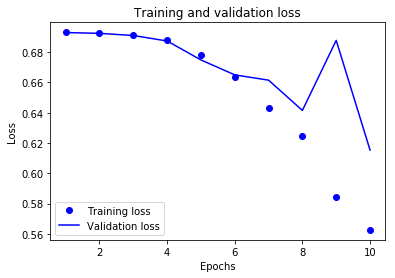

In [42]:
## graph of accuracy and loss over time


import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Note that the model is about to overfit if any more epochs are used. 



## POS Tagging<br>
Two common approaches to build a POS tagger are:<br>
a. Rule based <br>
b. Statistical based <br>
Statistical based approaches are further classified into Generative and Discriminative approaches.<br>
i. Differentiate between Generative and Discriminative approaches. <br>
ii. Provide examples of classifiers for both approaches (Give as many as possible).<br>
iii. Build any classifier (Generative or Discriminative) of your choice for POS tagging. Provide mathematical details of the chosen classifier. Also give reason for choosing that classifier. Write clearly about the features etc. Provide accuracy, precision, recall and f1 scores. Also comment on these scores.<br>
Use brown data set which can be downloaded using nltk downloader.

### Answer
#### i. Differentiate between Generative and Discriminative approaches. 
> A generative approach predicts $P(input, label)$, the joint probability of a $(input, label)$ pair.  and is more powerful. Whereas a discriminative approach predicts $P(label \vert input)$ — the probability of a label given the input value. <br>
> - Discriminative models learn the (hard or soft) boundary between classes.
> - Generative models model the distribution of individual classes.


####  ii. Provide examples of classifiers for both approaches (Give as many as possible). 
- Generative: Naive Bayes Classifier. 
- Discriminative:  Maximum Entropy classifier, SVM, Decision Tree

In [170]:
from nltk.corpus import brown

In [173]:
suffix_fdist = nltk.FreqDist()
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1

common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]

def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

In [174]:
tagges_words = brown.tagged_words(categories='news')
feature_sets = [(pos_features(word), tag) for word, tag in tagges_words]

In [177]:
train_set, test_set = feature_sets[:int(.9*len(feature_sets))], feature_sets[int(.9*len(feature_sets)):]

#### A discriminative model: Decision Tree for POS tagging

In [178]:
classifier_decision_tree = nltk.DecisionTreeClassifier.train(train_set)

In [179]:
nltk.classify.accuracy(classifier_decision_tree, test_set)

0.6268894192521878

#### A generative model: Naive Bayes for POS tagging

In [180]:
classifier_NaiveBayes = nltk.NaiveBayesClassifier.train(train_set)

In [181]:
nltk.classify.accuracy(classifier_NaiveBayes, test_set)

0.5684168655529037

In [227]:
refsets = collections.defaultdict(set)
testset = collections.defaultdict(set)
for i, (feature, label) in enumerate(test_set):
    refsets[label].add(i)
    predicted_label = classifier_decision_tree.classify(feature)
    testset[predicted_label].add(i)

In [221]:
precision(refsets['negative'], testset['negative'])

0.7964169381107492

In [222]:
recall(refsets['negative'], testset['negative'])

0.6909219357117626

In [223]:
f_measure(refsets['negative'], testset['negative'])

0.7399281255910725

In [224]:
precision(refsets['positive'], testset['positive'])

0.7270742358078602

In [225]:
recall(refsets['positive'], testset['positive'])

0.8233839632638643

In [226]:
f_measure(refsets['positive'], testset['positive'])

0.7722378664899784